# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [2]:
### Data generation
import sklearn
from sklearn.datasets import make_moons
import numpy as np
X, y = sklearn.datasets.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
print(X)
print(y)

[[ 1.83808810e+00 -4.55349012e-02]
 [-9.00968868e-01  4.33883739e-01]
 [ 9.00968868e-01  4.33883739e-01]
 [ 1.67230089e+00 -2.40277997e-01]
 [ 1.57211666e+00 -3.20172255e-01]
 [-8.01413622e-01  5.98110530e-01]
 [ 1.87131870e+00  9.28244800e-03]
 [-1.00000000e+00  1.22464680e-16]
 [-9.91790014e-01  1.27877162e-01]
 [ 4.81607432e-01 -3.55142763e-01]
 [ 9.26916757e-01  3.75267005e-01]
 [-6.23489802e-01  7.81831482e-01]
 [-9.81559157e-01  1.91158629e-01]
 [ 5.37461710e-01 -3.86599306e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [-2.84527587e-01  9.58667853e-01]
 [-7.18349350e-01  6.95682551e-01]
 [ 8.71318704e-01  4.90717552e-01]
 [ 7.18349350e-01  6.95682551e-01]
 [ 1.28452759e+00 -4.58667853e-01]
 [ 1.51839257e+00 -3.55142763e-01]
 [ 1.80141362e+00 -9.81105305e-02]
 [ 1.94905575e+00  1.84891782e-01]
 [ 1.15959990e+00 -4.87181783e-01]
 [-3.45365054e-01  9.38468422e-01]
 [ 1.22252093e+00 -4.74927912e-01]
 [ 5.18392568e-01  8.55142763e-01]
 [ 8.38088105e-01  5.45534901e-01]
 [ 1.98155916e+00  3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


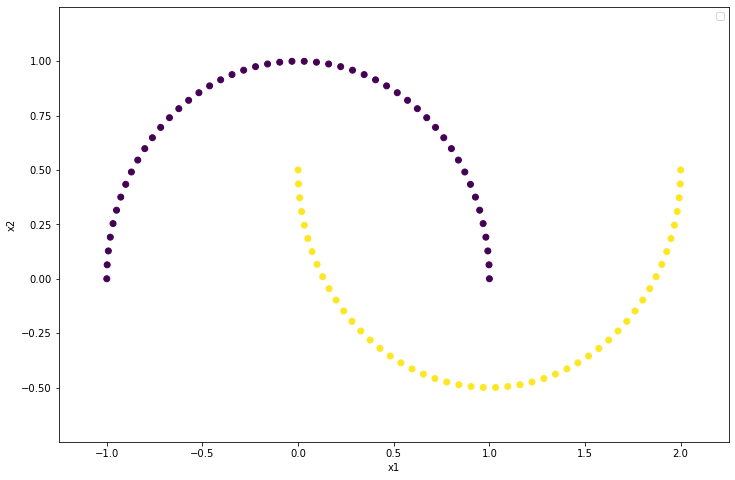

In [3]:
### This function allows to plot the two moons
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

delta = 0.25
x1_min, x1_max = X[:, 0].min() - delta, X[:, 0].max() + delta
x2_min, x2_max = X[:, 1].min() - delta, X[:, 1].max() + delta

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

plt.scatter(X[:,0], X[:,1], c=y)

x1_label = 'x1'
x2_label = 'x2'
plt.xlabel(x1_label)
plt.ylabel(x2_label)
plt.legend(loc = 'upper right')
plt.show()

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

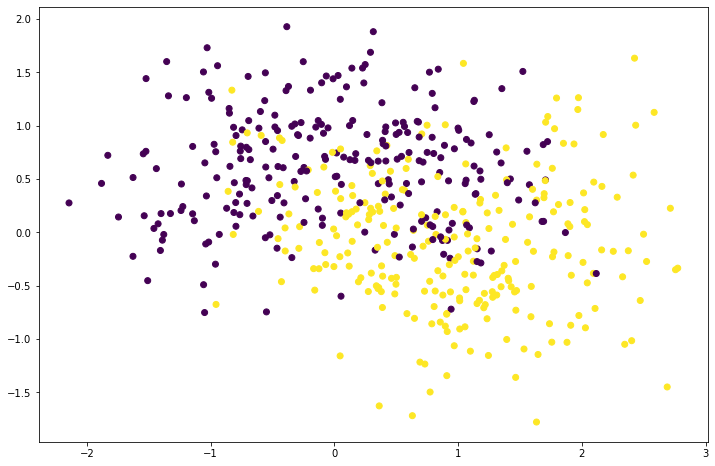

In [4]:
X, y = sklearn.datasets.make_moons(n_samples=500, shuffle=True, noise=0.5, random_state=None)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

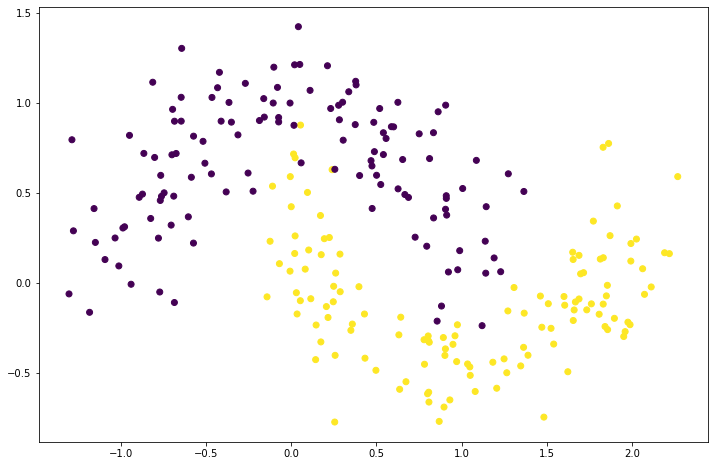

In [5]:
from sklearn.model_selection import train_test_split

X, y = sklearn.datasets.make_moons(n_samples=250, shuffle=True, noise=0.2, random_state=None)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   shuffle = True)

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

def initialize_model():
    # define the keras model
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    return model

model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])

In [41]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 15        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


You are now ready to train your algorithm on the training set:

In [43]:
results = model.fit(X_train, y_train, batch_size = 150, epochs = 10)

Epoch 1/10
2/2 [==============================] - 0s 10ms/step - loss: 0.3122 - accuracy: 0.8800
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 0.3120 - accuracy: 0.8800
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 0.3117 - accuracy: 0.8800
Epoch 4/10
2/2 [==============================] - 0s 10ms/step - loss: 0.3115 - accuracy: 0.8800
Epoch 5/10
2/2 [==============================] - 0s 13ms/step - loss: 0.3112 - accuracy: 0.8800
Epoch 6/10
2/2 [==============================] - 0s 15ms/step - loss: 0.3110 - accuracy: 0.8800
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: 0.3108 - accuracy: 0.8800
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 0.3106 - accuracy: 0.8800
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 0.3104 - accuracy: 0.8800
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 0.3102 - accuracy: 0.8800


### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [52]:
history = model.fit(X_train, y_train, validation_split=0.3, batch_size=150, epochs = 10)
print(hist.history)

Epoch 1/10
1/1 [==============================] - 0s 73ms/step - loss: 0.3075 - accuracy: 0.8770 - val_loss: 0.3056 - val_accuracy: 0.8868
Epoch 2/10
1/1 [==============================] - 0s 32ms/step - loss: 0.3074 - accuracy: 0.8770 - val_loss: 0.3055 - val_accuracy: 0.8868
Epoch 3/10
1/1 [==============================] - 0s 32ms/step - loss: 0.3073 - accuracy: 0.8770 - val_loss: 0.3055 - val_accuracy: 0.8868
Epoch 4/10
1/1 [==============================] - 0s 33ms/step - loss: 0.3072 - accuracy: 0.8770 - val_loss: 0.3054 - val_accuracy: 0.8868
Epoch 5/10
1/1 [==============================] - 0s 30ms/step - loss: 0.3071 - accuracy: 0.8770 - val_loss: 0.3053 - val_accuracy: 0.8868
Epoch 6/10
1/1 [==============================] - 0s 32ms/step - loss: 0.3069 - accuracy: 0.8770 - val_loss: 0.3053 - val_accuracy: 0.8868
Epoch 7/10
1/1 [==============================] - 0s 33ms/step - loss: 0.3068 - accuracy: 0.8770 - val_loss: 0.3052 - val_accuracy: 0.8868
Epoch 8/10
1/1 [===========

❓ Plot the history of the train loss using the following function

In [53]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x1c497c9c850>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.3075263500213623,
   0.3074091076850891,
   0.30729255080223083,
   0.3071766197681427,
   0.30706125497817993,
   0.306946337223053,
   0.3068319857120514,
   0.3067180812358856,
   0.30660462379455566,
   0.3064917027950287],
  'accuracy': [0.8770492076873779,
   0.8770492076873779,
   0.8770492076873779,
   0.8770492076873779,
   0.8770492076873779,
   0.8770492076873779,
   0.8770492076873779,
   0.8770492076873779,
   0.8770492076873779,
   0.8770492076873779],
  'val_loss': [0.3055637776851654,
   0.3055090606212616,
   0.30545446276664734,
   0.30539998412132263,
   0.3053455948829651,
   0.30529123544692993,
   0.3052370548248291,
   0.3051830232143402,
   0.3051290810108185,
   0.3050753176212311],
  'val_accuracy': [0.8867924809455872,
   0.8867924809455872,
   0.8867924809455872,
   0.8867924809455872,
  

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [54]:
y_pred = model.predict(X_train)

6/6 [==============================] - 0s 1ms/step


You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [73]:
def evaluate():
    metrics = model.evaluate(
        x=X_test,
        y=y_test,
        batch_size=150,
        verbose=1,
        sample_weight=None
    )
    print ('Loss: {:.3f}, Accuracy: {:.3f}'.format(metrics[0], metrics[1]))


evaluate()
model.fit(x=X_test[:150,...], y=y_test[:150,...], batch_size=150, epochs=1, validation_data=(X_test[:150,...], y_test[:150,...]))
evaluate()

1/1 [==============================] - 0s 22ms/step - loss: 0.3152 - accuracy: 0.8533
Loss: 0.315, Accuracy: 0.853
1/1 [==============================] - 0s 22ms/step - loss: 0.3151 - accuracy: 0.8533
Loss: 0.315, Accuracy: 0.853


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [74]:
accuracy = 0.8533

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

1831/1831 [==============================] - 4s 2ms/step


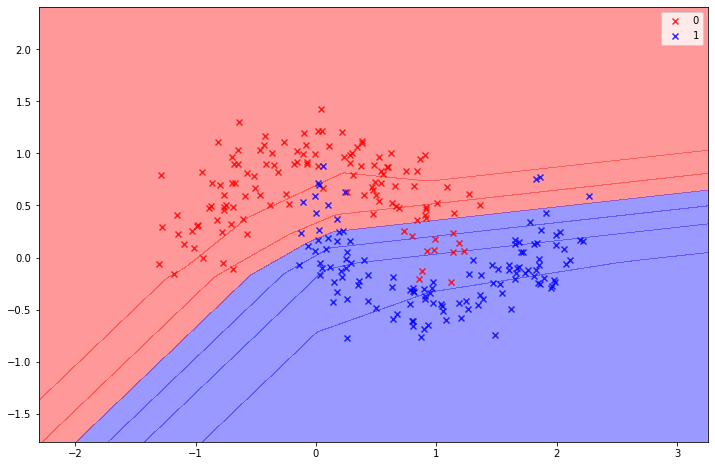

In [98]:

from utils.plots import plot_decision_regions
plot_decision_regions(X, y, model)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [125]:
def initialize_model():
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    return model

model = initialize_model()

#compile puis summary puis result = model.fit

In [128]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
print(model.summary())
result = model.fit(X_train, y_train, epochs = 500)
print(history.model)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 5)                 15        
                                                                 
 dense_18 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
6/6 [==============================] - 2s 4ms/step - loss: 0.2716 - accuracy: 0.8857
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2713 - accuracy: 0.8857
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2712 - accuracy: 0.8857
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.8857
Epoch 5/500
6/6 [==============================] - 0s 5ms/st

6/6 [==============================] - 0s 5ms/step - loss: 0.2670 - accuracy: 0.8857
Epoch 78/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2670 - accuracy: 0.8857
Epoch 79/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2670 - accuracy: 0.8857
Epoch 80/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.8857
Epoch 81/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2670 - accuracy: 0.8857
Epoch 82/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.8857
Epoch 83/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2668 - accuracy: 0.8857
Epoch 84/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2668 - accuracy: 0.8857
Epoch 85/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2667 - accuracy: 0.8857
Epoch 86/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2666 - accuracy: 0.8857
Epoch 87/500
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.8914
Epoch 161/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.8914
Epoch 162/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2644 - accuracy: 0.8971
Epoch 163/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2646 - accuracy: 0.8914
Epoch 164/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2643 - accuracy: 0.8914
Epoch 165/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2643 - accuracy: 0.8914
Epoch 166/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2643 - accuracy: 0.8971
Epoch 167/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.8971
Epoch 168/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.8971
Epoch 169/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2643 - accuracy: 0.8971
Epoch 170/500
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.2629 - accuracy: 0.8971
Epoch 243/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.8971
Epoch 244/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.8971
Epoch 245/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2628 - accuracy: 0.8971
Epoch 246/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.8971
Epoch 247/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.8971
Epoch 248/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.8971
Epoch 249/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2627 - accuracy: 0.8971
Epoch 250/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2627 - accuracy: 0.8971
Epoch 251/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.8971
Epoch 252/500
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.2617 - accuracy: 0.8971
Epoch 325/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.8971
Epoch 326/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.8971
Epoch 327/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2617 - accuracy: 0.8971
Epoch 328/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2618 - accuracy: 0.8971
Epoch 329/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2618 - accuracy: 0.8971
Epoch 330/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2617 - accuracy: 0.8971
Epoch 331/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.8971
Epoch 332/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.8971
Epoch 333/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2616 - accuracy: 0.8971
Epoch 334/500
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.2609 - accuracy: 0.8971
Epoch 407/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8971
Epoch 408/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2609 - accuracy: 0.8971
Epoch 409/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8971
Epoch 410/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2609 - accuracy: 0.8971
Epoch 411/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2609 - accuracy: 0.8971
Epoch 412/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8971
Epoch 413/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8971
Epoch 414/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.8971
Epoch 415/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8971
Epoch 416/500
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.8971
Epoch 489/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.8971
Epoch 490/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.8971
Epoch 491/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.8971
Epoch 492/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2601 - accuracy: 0.8971
Epoch 493/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2601 - accuracy: 0.8971
Epoch 494/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 0.8971
Epoch 495/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.8971
Epoch 496/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2601 - accuracy: 0.8971
Epoch 497/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2601 - accuracy: 0.8971
Epoch 498/500
6/6 [=====

❓ Did the test accuracy improve?

In [129]:
accuracy = 0.8971
print('Yes, the accuracy improve')

Yes, the accuracy improve


Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [144]:
def initialize_model():
    # define the keras model
    model = Sequential()
    model.add(Dense(20, input_dim=2, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

model = initialize_model()

In [157]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=500)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 20)                60        
                                                                 
 dense_27 (Dense)            (None, 10)                210       
                                                                 
 dense_28 (Dense)            (None, 5)                 55        
                                                                 
 dense_29 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
6/6 [==============================] - 2s 5ms/step - loss: 0.0854 - accuracy: 0.9771
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0811 - accuracy: 

6/6 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9829
Epoch 76/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0631 - accuracy: 0.9886
Epoch 77/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0628 - accuracy: 0.9829
Epoch 78/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0627 - accuracy: 0.9829
Epoch 79/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0628 - accuracy: 0.9829
Epoch 80/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9829
Epoch 81/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0619 - accuracy: 0.9829
Epoch 82/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0616 - accuracy: 0.9829
Epoch 83/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0617 - accuracy: 0.9829
Epoch 84/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9829
Epoch 85/500
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9829
Epoch 159/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0510 - accuracy: 0.9829
Epoch 160/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0512 - accuracy: 0.9829
Epoch 161/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0507 - accuracy: 0.9829
Epoch 162/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0508 - accuracy: 0.9829
Epoch 163/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9829
Epoch 164/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0503 - accuracy: 0.9829
Epoch 165/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0505 - accuracy: 0.9829
Epoch 166/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0504 - accuracy: 0.9829
Epoch 167/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0505 - accuracy: 0.9829
Epoch 168/500
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.9829
Epoch 241/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0436 - accuracy: 0.9829
Epoch 242/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9829
Epoch 243/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0433 - accuracy: 0.9829
Epoch 244/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0430 - accuracy: 0.9829
Epoch 245/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0432 - accuracy: 0.9829
Epoch 246/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0426 - accuracy: 0.9829
Epoch 247/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9829
Epoch 248/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0430 - accuracy: 0.9829
Epoch 249/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.9829
Epoch 250/500
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9829
Epoch 323/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0376 - accuracy: 0.9829
Epoch 324/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0376 - accuracy: 0.9829
Epoch 325/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9829
Epoch 326/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9886
Epoch 327/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.9829
Epoch 328/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9829
Epoch 329/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9829
Epoch 330/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.9829
Epoch 331/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.9829
Epoch 332/500
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9886
Epoch 405/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.9886
Epoch 406/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9886
Epoch 407/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9829
Epoch 408/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.9829
Epoch 409/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9886
Epoch 410/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9886
Epoch 411/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9886
Epoch 412/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9886
Epoch 413/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9886
Epoch 414/500
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 0.9886
Epoch 487/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0301 - accuracy: 0.9886
Epoch 488/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0297 - accuracy: 0.9886
Epoch 489/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9886
Epoch 490/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9886
Epoch 491/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9886
Epoch 492/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9886
Epoch 493/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9886
Epoch 494/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9886
Epoch 495/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9886
Epoch 496/500
6/6 [=====

❓ What is the number of parameters of your new model?

In [159]:
params = model.count_params()
print('Le nombre de paramètres est', params)

Le nombre de paramètres est 331


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [149]:
history = model.fit(X_train, y_train, batch_size=32, epochs=500)

Epoch 1/500
6/6 [==============================] - 3s 5ms/step - loss: 0.6951 - accuracy: 0.4686
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.4629
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6623 - accuracy: 0.4686
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6455 - accuracy: 0.4914
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6325 - accuracy: 0.5657
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6220 - accuracy: 0.6000
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.6457
Epoch 8/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6050 - accuracy: 0.7029
Epoch 9/500
6/6 [==============================] - 0s 7ms/step - loss: 0.5987 - accuracy: 0.7200
Epoch 10/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5919 - accuracy: 0.7314
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 5ms/step - loss: 0.3910 - accuracy: 0.9086
Epoch 85/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3895 - accuracy: 0.9086
Epoch 86/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3883 - accuracy: 0.9143
Epoch 87/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.9143
Epoch 88/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3846 - accuracy: 0.9143
Epoch 89/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3832 - accuracy: 0.9143
Epoch 90/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3812 - accuracy: 0.9143
Epoch 91/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3793 - accuracy: 0.9143
Epoch 92/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3776 - accuracy: 0.9143
Epoch 93/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3758 - accuracy: 0.9143
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.9714
Epoch 168/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 0.9714
Epoch 169/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2589 - accuracy: 0.9714
Epoch 170/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2573 - accuracy: 0.9714
Epoch 171/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.9714
Epoch 172/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2548 - accuracy: 0.9714
Epoch 173/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2535 - accuracy: 0.9714
Epoch 174/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2519 - accuracy: 0.9714
Epoch 175/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2510 - accuracy: 0.9714
Epoch 176/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.9714
Epoch 177/500
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.1772 - accuracy: 0.9771
Epoch 250/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1769 - accuracy: 0.9771
Epoch 251/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1761 - accuracy: 0.9771
Epoch 252/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1750 - accuracy: 0.9771
Epoch 253/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1742 - accuracy: 0.9771
Epoch 254/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1734 - accuracy: 0.9771
Epoch 255/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1734 - accuracy: 0.9771
Epoch 256/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1724 - accuracy: 0.9771
Epoch 257/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1719 - accuracy: 0.9771
Epoch 258/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1713 - accuracy: 0.9771
Epoch 259/500
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9771
Epoch 332/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.9771
Epoch 333/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1301 - accuracy: 0.9771
Epoch 334/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1302 - accuracy: 0.9771
Epoch 335/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1291 - accuracy: 0.9771
Epoch 336/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1281 - accuracy: 0.9771
Epoch 337/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1278 - accuracy: 0.9771
Epoch 338/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1270 - accuracy: 0.9771
Epoch 339/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1268 - accuracy: 0.9771
Epoch 340/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9771
Epoch 341/500
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.1012 - accuracy: 0.9829
Epoch 414/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1013 - accuracy: 0.9829
Epoch 415/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1012 - accuracy: 0.9829
Epoch 416/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1006 - accuracy: 0.9829
Epoch 417/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1000 - accuracy: 0.9829
Epoch 418/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0999 - accuracy: 0.9829
Epoch 419/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0995 - accuracy: 0.9829
Epoch 420/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0992 - accuracy: 0.9829
Epoch 421/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0992 - accuracy: 0.9829
Epoch 422/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0988 - accuracy: 0.9829
Epoch 423/500
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.0819 - accuracy: 0.9886
Epoch 496/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.9829
Epoch 497/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0834 - accuracy: 0.9829
Epoch 498/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0834 - accuracy: 0.9829
Epoch 499/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0826 - accuracy: 0.9829
Epoch 500/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0827 - accuracy: 0.9771


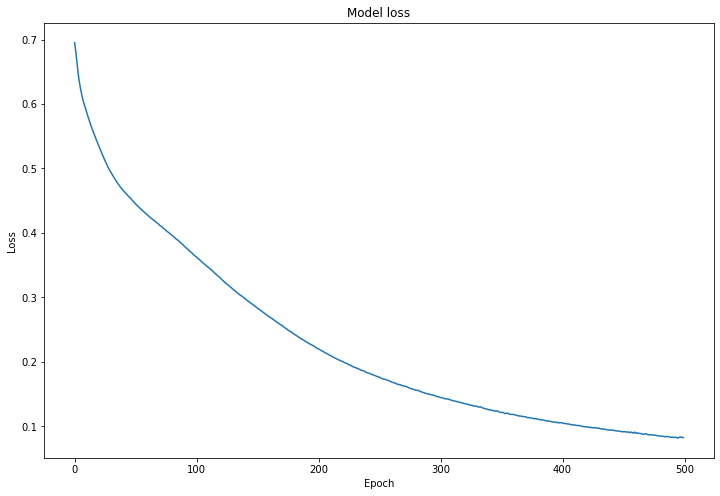

In [160]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [161]:
test_loss, test_acc = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9733


In [162]:
accuracy_deep = test_acc

❓ Do you think we have overfitted on the noise? Check it out below

1766/1766 [==============================] - 4s 2ms/step


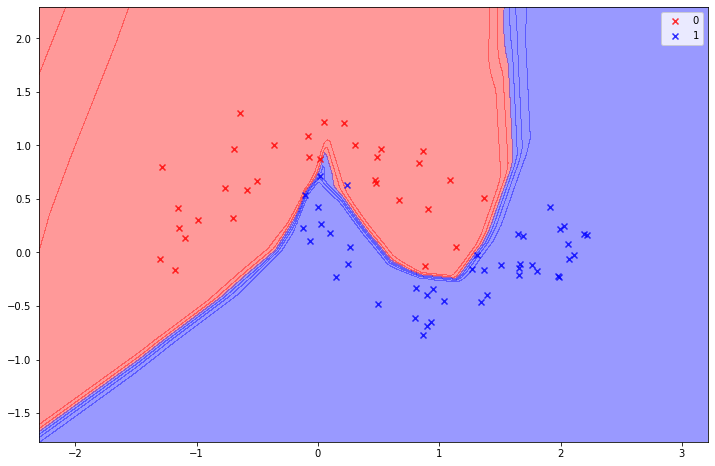

In [163]:
plot_decision_regions(X_test, y_test, model)

Il y a moins d'erreurs sur les données test que sur les données train, ce n'est pas un cas de surapprentissage.